In [2]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
dfa = pd.read_csv('linear_classifier.csv')

In [4]:
dfa.head()

x   y labels
0  1  13      x
1  8  18      o
2  9  25      x
3  5  25      x
4  4  17      x

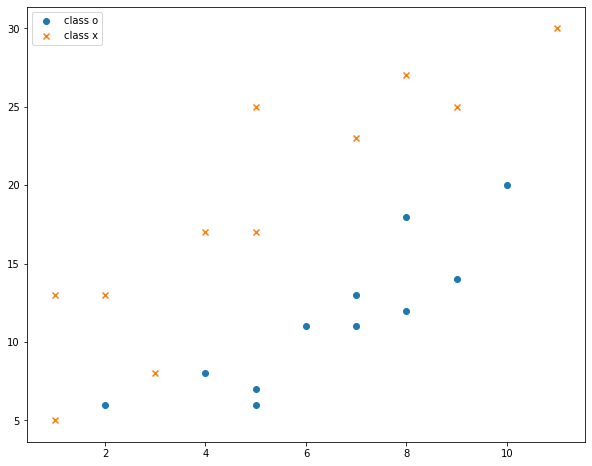

In [8]:
plt.figure(figsize=(10, 8))
for label, label_class in dfa.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1], 
               label=f'class {label}', marker=label)
plt.legend()
plt.show()

fit a linear regression model

In [9]:
model = LinearRegression()
model.fit(dfa['x'].values.reshape((-1, 1)), dfa['y'].values.reshape((-1, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
trend = model.predict(np.linspace(0, 10).reshape((-1, 1)))

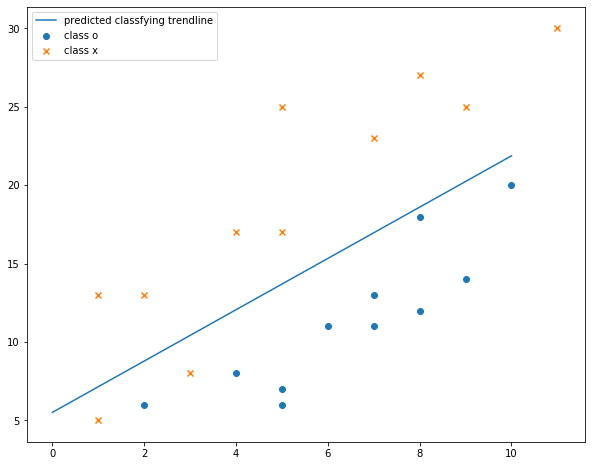

In [11]:
plt.figure(figsize=(10, 8))
for label, label_class in dfa.groupby('labels'):
    plt.scatter(label_class.values[:,0], label_class.values[:,1], 
               label=f'class {label}', marker=label)
plt.plot(np.linspace(0, 10), trend, label="predicted classfying trendline")
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(dfa['x'].values.reshape((-1, 1)))
preds = []

for _y, _y_pred in zip(dfa['y'], y_pred):
    if _y < _y_pred:
        preds.append('o')
    else:
        preds.append('x')

dfa['Preds'] = preds

In [13]:
dfa

x   y labels Preds
0    1  13      x     x
1    8  18      o     o
2    9  25      x     x
3    5  25      x     x
4    4  17      x     x
5    7  23      x     x
6    8  12      o     o
7    4   8      o     o
8   10  20      o     o
9   11  30      x     x
10   5  17      x     x
11   7  11      o     o
12   2  13      x     x
13   8  27      x     x
14   9  14      o     o
15   1   5      x     o
16   2   6      o     o
17   5   6      o     o
18   5   7      o     o
19   6  11      o     o
20   7  13      o     o
21   3   8      x     o

Text(0.5, 1.0, 'Linear Classifier')

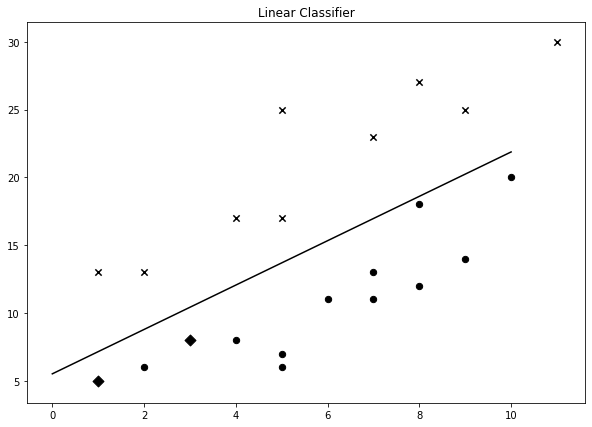

In [23]:
plt.figure(figsize=(10, 7))
for idx, label_class in dfa.iterrows():
    if label_class.labels != label_class['Preds']:
        label = 'D'
        size = 60
    else:
        label = label_class.labels
        size = 40
    plt.scatter(label_class.values[0], label_class.values[1],
                label=f'Class {label}', marker=label, c='k', s=size)
      
plt.plot(np.linspace(0, 10), trend, c='k', label='Trendline')
plt.title("Linear Classifier")
